In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

Extent       Date
0    1090625.815 1979-01-01
1    1157634.866 1979-02-01
2    1299583.477 1979-03-01
3    1137194.680 1979-04-01
4     983083.453 1979-05-01
..           ...        ...
533   781460.891 2023-06-01
534   331845.048 2023-07-01
535    99334.625 2023-08-01
536    49359.723 2023-09-01
537    85693.282 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
extent = Baffin['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(64, kernel_constraint=MaxNorm(1.0), activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [9]:
cp = ModelCheckpoint('Baffin_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2227 - root_mean_squared_error: 0.4719

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 9s 107ms/step - loss: 0.2251 - root_mean_squared_error: 0.4745 - val_loss: 0.2379 - val_root_mean_squared_error: 0.4877
Epoch 2/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1813 - root_mean_squared_error: 0.4258

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.1820 - root_mean_squared_error: 0.4267 - val_loss: 0.1983 - val_root_mean_squared_error: 0.4453
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1476 - root_mean_squared_error: 0.3842

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.1478 - root_mean_squared_error: 0.3844 - val_loss: 0.1663 - val_root_mean_squared_error: 0.4078
Epoch 4/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1190 - root_mean_squared_error: 0.3450

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.1166 - root_mean_squared_error: 0.3415 - val_loss: 0.1369 - val_root_mean_squared_error: 0.3700
Epoch 5/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0864 - root_mean_squared_error: 0.2939

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0897 - root_mean_squared_error: 0.2995 - val_loss: 0.1099 - val_root_mean_squared_error: 0.3315
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.0695 - root_mean_squared_error: 0.2636

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0695 - root_mean_squared_error: 0.2636 - val_loss: 0.0875 - val_root_mean_squared_error: 0.2959
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0543 - root_mean_squared_error: 0.2330

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0543 - root_mean_squared_error: 0.2329 - val_loss: 0.0715 - val_root_mean_squared_error: 0.2674
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0489 - root_mean_squared_error: 0.2212

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0460 - root_mean_squared_error: 0.2145 - val_loss: 0.0562 - val_root_mean_squared_error: 0.2371
Epoch 9/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1866

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 103ms/step - loss: 0.0354 - root_mean_squared_error: 0.1881 - val_loss: 0.0454 - val_root_mean_squared_error: 0.2132
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0277 - root_mean_squared_error: 0.1663

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0282 - root_mean_squared_error: 0.1678 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1801
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0213 - root_mean_squared_error: 0.1461

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1374

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 103ms/step - loss: 0.0192 - root_mean_squared_error: 0.1386 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1222
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0176 - root_mean_squared_error: 0.1326

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1152

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0716
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0725
Epoch 16/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1205

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 17/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1119

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0436
Epoch 18/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1076

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0091 - root_mean_squared_error: 0.0955 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 22/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1243

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0459
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0446
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0092 - root_mean_squared_error: 0.0962 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0017 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0129 - root_mean_squared_error: 0.1138 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0424
Epoch 38/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0069 - root_mean_squared_error: 0.0833 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0437
Epoch 40/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0021 - val_root_mean_squared

In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

1.8662140687306723 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

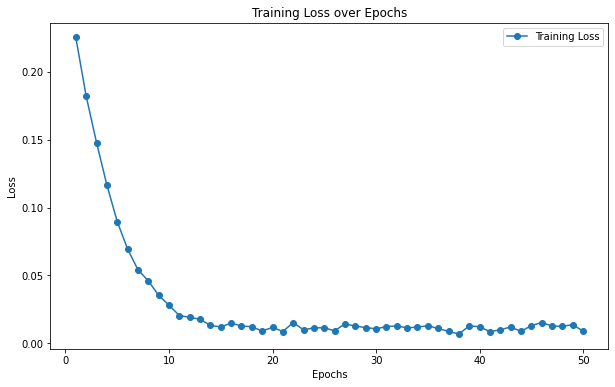

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

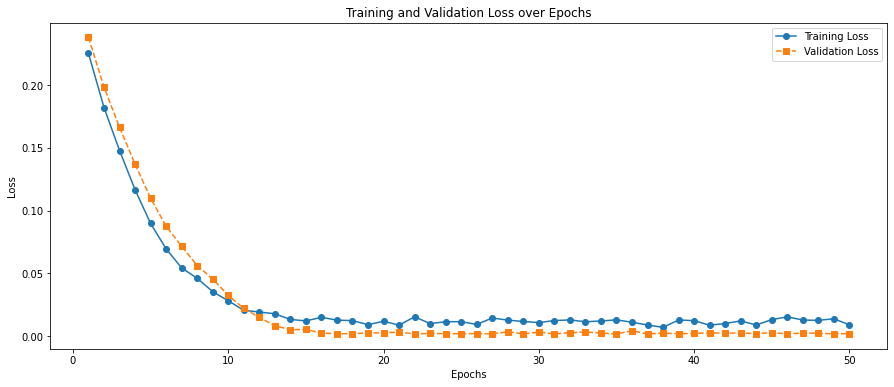

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 10ms/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.04303459298953198


In [11]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.03312055653507698


In [12]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [13]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        9.612115e+05     936648.998
1        6.651280e+05     587385.424
2        2.840198e+05     171258.094
3        1.469479e+04      46930.952
4        4.002509e+04      27600.624
5        2.168286e+05      61057.940
6        4.118703e+05     291275.949
7        6.600641e+05     678576.504
8        9.750388e+05     974461.347
9        1.157802e+06    1181121.087
10       1.231856e+06    1236299.254
11       1.147726e+06    1036981.003
12       9.102941e+05     847489.150
13       5.336477e+05     619129.338
14       2.257916e+05     195688.491
15      -4.175482e+02      36670.811
16       3.257236e+04      31777.310
17       1.238468e+05      82762.022
18       4.109046e+05     400043.823
19       6.940404e+05     733089.555
20       1.005290e+06     917362.266
21       1.127461e+06    1040584.040
22       1.105355e+06    1147997.675
23       1.052416e+06    1074255.327
24       8.791868e+05     875527.315
25       6.036001e+05     629820.756
26       2.574365e+05     204308.900
27       1.367727e+04      45059.062
28       2.484145e+04      33770.277
29       1.360593e+05      64135.631
30       3.832342e+05     400581.715
31       6.997740e+05     698631.451
32       9.373399e+05     973313.225
33       1.139808e+06    1335339.087
34       1.268711e+06    1429096.704
35       1.278826e+06    1206542.314
36       1.009183e+06    1079292.433
37       6.954833e+05     788101.638
38       3.344194e+05     397326.270
39       6.755591e+04      97802.348
40       7.790271e+03      62212.219
41       9.019186e+04     154051.600
42       4.877449e+05     610663.893
43       8.436031e+05     756679.164
44       1.138247e+06     962270.215
45       1.215733e+06    1235154.518
46       1.291689e+06    1161744.519
47       1.163423e+06    1136918.669
48       1.005031e+06     995852.026
49       7.364668e+05     781460.891
50       4.349206e+05     331845.048
51       8.997530e+04      99334.625
52       7.204866e+04      49359.723
53       1.509490e+05      85693.282

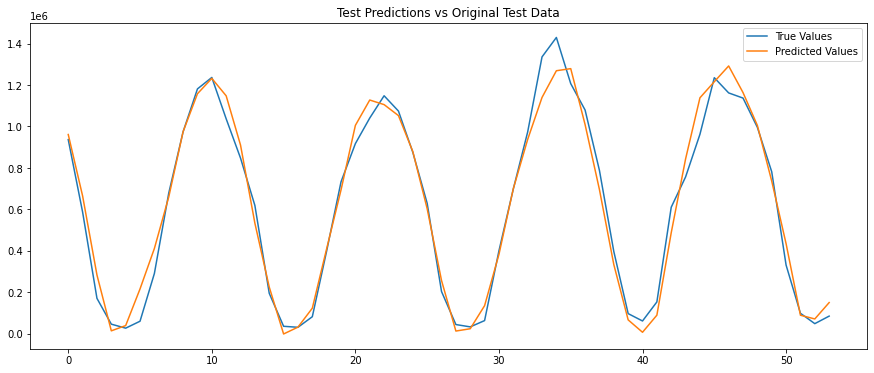

In [14]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [15]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [16]:
mse = mean_squared_error(y, predictions)
print(mse)

0.0018447478831249864


In [17]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.03354865883656653


In [12]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

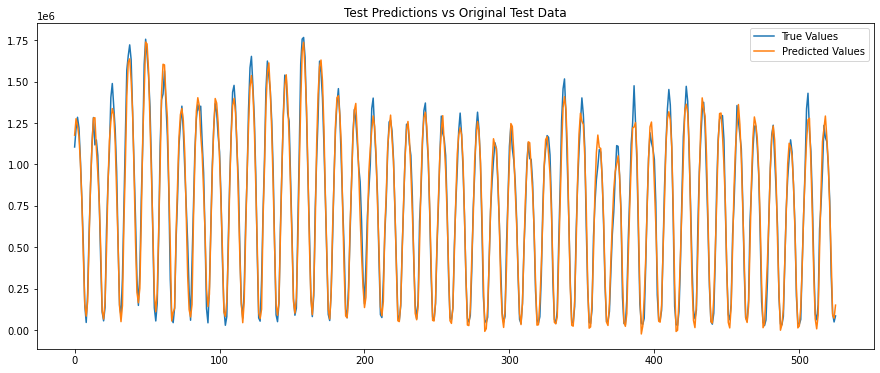

In [13]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()